In [145]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [66]:
data_folder = '/home/lantro/Documents/Algo Trading/LEAN/data/yahoo/'
ticker = 'spy' #'eurusd=x'
#df = yf.download(ticker, start='2022-03-17', interval='30m')
#df.to_csv(data_folder+ticker+'.csv')
df = pd.read_csv(f"{data_folder}{ticker}.csv", index_col=[0], parse_dates=True, skipinitialspace=True)
start_date = '2020-01-01'
end_date = '2022-05-01'
df = df.loc[start_date:end_date]

In [67]:
df.head()

,open,high,low,close,adjclose,volume,ticker
2020-01-02,323.540009,324.890015,322.529999,324.869995,313.744507,59151200,SPY
2020-01-03,321.160004,323.640015,321.100006,322.410004,311.368805,77709700,SPY
2020-01-06,320.489990,323.730011,320.359985,323.640015,312.556641,55653900,SPY
2020-01-07,323.019989,323.540009,322.239990,322.730011,311.677856,40496400,SPY
2020-01-08,322.940002,325.779999,322.670013,324.450012,313.338928,68296000,SPY


In [68]:
# This is my attempt to separate out the plotting from the strategy.
def MACD(df, s, l, signal):
    #Create new dataframe to hold signal values with same index as original df
    # Future: use lag parameter to offset signals when using longer s, l time periods otherwise when you try to use the 
    # combination of MACD signals for buy/sell signals, they won't line up in time, i.e. macd with shorter ema time will get signals earlier
    signal_df = pd.DataFrame(index=df.index)
    signal_df["macd"] = df.close.ewm(span=s, min_periods=1).mean() - df.close.ewm(span=l, min_periods=1).mean()
    signal_df["signal"] = signal_df.macd.ewm(span=signal, min_periods=1).mean()
    signal_df["diff"] = signal_df["macd"] - signal_df["signal"]

    # Cross points (buys / sells)
    # buy_sell_hold: 1 = buy, 0 = hold, -1 = sell
    for i in range(1, len(df)): # This is a slow way to do this. Should use apply or iterrows
        if signal_df.iloc[i-1]["diff"] < 0 and signal_df.iloc[i]["diff"] > 0: # MACD above signal after being below on previous day
            #print("{}:GOLDEN CROSS".format(df.iloc[i].name))
            df.loc[df.iloc[i].name,f's_macd_{s}_{l}_{signal}'] = 1

        elif signal_df.iloc[i-1]["diff"] > 0 and signal_df.iloc[i]["diff"] < 0: # MACD below signal after being above the previous day
            #print("{}:DEAD CROSS".format(df.iloc[i].name))
            df.loc[df.iloc[i].name,f's_macd_{s}_{l}_{signal}'] = -1
        else:
            # Don't do anything, no new signal
            #print("{}:NO CROSS".format(df.iloc[i].name))
            df.loc[df.iloc[i].name,f's_macd_{s}_{l}_{signal}'] = 0  
    return(df,signal_df)


In [69]:
df, macd_df = MACD(df, 12, 26, 9)
#df, macd2_df = MACD(df, 15, 30, 12)

#df[df.iloc[:,-1] == 1] # All rows where last column value = 1
#df[df.iloc[:,7:] == 1] # All rows where last column value = 1
macd_df.head()
#df.head(20)
# View rows where either signal column signaled a buy 
df.loc[(df.filter(regex='^s_.*').values == 1).any(axis=1)]

,open,high,low,close,adjclose,volume,ticker,s_macd_12_26_9
2020-01-08,322.940002,325.779999,322.670013,324.450012,313.338928,68296000,SPY,1.0
2020-02-05,332.269989,333.089996,330.670013,332.859985,321.460846,65951100,SPY,1.0
2020-03-26,249.520004,262.799988,249.050003,261.200012,253.738281,257632800,SPY,1.0
2020-05-19,294.350006,296.209991,291.950012,291.970001,283.629333,95189300,SPY,1.0
2020-07-08,314.609985,316.299988,312.700012,316.179993,308.499298,54638600,SPY,1.0
2020-08-03,328.320007,329.619995,327.730011,328.790009,320.802979,53077900,SPY,1.0
2020-08-24,342.119995,343.000000,339.450012,342.920013,334.589752,48588700,SPY,1.0
2020-10-01,337.690002,338.739990,335.010010,337.040009,330.168945,88698700,SPY,1.0
2020-11-05,349.239990,352.190002,348.859985,350.239990,343.099823,82039700,SPY,1.0
2021-01-07,376.100006,379.899994,375.910004,379.100006,372.954529,68766800,SPY,1.0


In [70]:
def trend(df, short_period, long_period, pct_over=1):
    #Calculate the required moving averages and difference between the two and return as df
    signal_df = pd.DataFrame(index=df.index)
    signal_df[f'{short_period}_EMA'] = df.close.ewm(span=short_period, min_periods=short_period).mean()
    signal_df[f'{long_period}_EMA'] = df.close.ewm(span=long_period, min_periods=long_period).mean()
    signal_df[f'{short_period}-{long_period}_diff'] = signal_df[f'{short_period}_EMA']-signal_df[f'{long_period}_EMA']
    signal_df[f's_uptrend_{short_period}-{long_period}'] = (np.where((signal_df[f'{short_period}-{long_period}_diff'] >= (signal_df[f'{long_period}_EMA']*pct_over*.01)), 1, -1))
    # Don't add to original df #df[f's_uptrend_{short_period}-{long_period}'] = signal_df[f's_uptrend_{short_period}-{long_period}']
    return signal_df

In [71]:
test = trend(df, 20, 50,1)
#test.tail()
test.filter(regex='^s_.*')

,s_uptrend_20-50
2020-01-02,-1
2020-01-03,-1
2020-01-06,-1
2020-01-07,-1
2020-01-08,-1
...,...
2022-04-25,-1
2022-04-26,-1
2022-04-27,-1
2022-04-28,-1


In [72]:
#df.drop('s_uptrend_20-50', axis=1, inplace=True)
df.tail()

,open,high,low,close,adjclose,volume,ticker,s_macd_12_26_9
2022-04-25,423.670013,428.690002,418.839996,428.510010,428.510010,119647700,SPY,0.0
2022-04-26,425.829987,426.040009,416.070007,416.100006,416.100006,103996300,SPY,0.0
2022-04-27,417.239990,422.920013,415.010010,417.269989,417.269989,122030000,SPY,0.0
2022-04-28,422.290009,429.640015,417.600006,427.809998,427.809998,105449100,SPY,0.0
2022-04-29,423.589996,425.869995,411.209991,412.000000,412.000000,145187900,SPY,0.0


In [73]:
def bullish_ranking(df):
    # We can use some trend indicators to determine how long or short we want to be
    # Calculate some trend indicators, then sum to create a 'bullish' ranking to add to the main df.
    bullish_df = pd.DataFrame(index=df.index)
    bullish_df = bullish_df.join(trend(df, 20, 50,1).filter(regex='^s_.*')) #Just get the signal values from the df
    # Stock above 20 MA
    # 20 MA above 50 MA
    # 50 MA above 200 MA
    return bullish_df

bullish_ranking(df)
#signal_df[signal_df['bullishness']==1]
#df[df['bullishness']==1]


,s_uptrend_20-50
2020-01-02,-1
2020-01-03,-1
2020-01-06,-1
2020-01-07,-1
2020-01-08,-1
...,...
2022-04-25,-1
2022-04-26,-1
2022-04-27,-1
2022-04-28,-1


In [74]:
def set_holdings(df, short=False):
    # We are using the 'all' numpy method which evaluates to True only if all items in array evaluate to True
    # Alternatively, we can use the 'any' method
    df['buy_sell'] = 0 # Create column to hold buy/sell signals for plotting 
    df['holdings'] = np.NaN # Create new 'holdings column'
    # LONG signals - set holdings
    df.loc[(df.filter(regex='^s_.*').values == 1).all(axis=1),'buy_sell'] = 1
    # SHORT signals - set holdings
    df.loc[(df.filter(regex='^s_.*').values == -1).all(axis=1),'buy_sell'] = -1
    # Set holdings
    df.loc[df['buy_sell'] == 1,'holdings'] = 1
    if short == True:
        df.loc[df['buy_sell'] == -1,'holdings'] = -1
    else:
        #df.loc[(df.filter(regex='^s_.*').values == -1).all(axis=1),'holdings'] = 0
        df.loc[df['buy_sell'] == -1,'holdings'] = -1
    # NEUTRAL signals - we will just fill forward values from rows that had signals to cells with NaN values
    df['holdings'].ffill(inplace=True)
    return(df)


set_holdings(df, short=True)
df[df['buy_sell'] == -1]
df.head(20)
    

,open,high,low,close,adjclose,volume,ticker,s_macd_12_26_9,buy_sell,holdings
2020-01-02,323.540009,324.890015,322.529999,324.869995,313.744507,59151200,SPY,NaN,0,NaN
2020-01-03,321.160004,323.640015,321.100006,322.410004,311.368805,77709700,SPY,0.0,0,NaN
2020-01-06,320.489990,323.730011,320.359985,323.640015,312.556641,55653900,SPY,0.0,0,NaN
2020-01-07,323.019989,323.540009,322.239990,322.730011,311.677856,40496400,SPY,0.0,0,NaN
2020-01-08,322.940002,325.779999,322.670013,324.450012,313.338928,68296000,SPY,1.0,1,1.0
2020-01-09,326.160004,326.730011,325.519989,326.649994,315.463501,48473300,SPY,0.0,0,1.0
2020-01-10,327.290009,327.459991,325.200012,325.709991,314.555756,53029300,SPY,0.0,0,1.0
2020-01-13,326.390015,327.959991,325.920013,327.950012,316.719055,47086800,SPY,0.0,0,1.0
2020-01-14,327.470001,328.619995,326.839996,327.450012,316.236176,62832800,SPY,0.0,0,1.0
2020-01-15,327.350006,329.019989,327.260010,328.190002,316.950775,72056600,SPY,0.0,0,1.0


In [75]:
def set_holdings_old(df, columns, short=False):
    # Pass df, signal columns containing buy/sell/hold (1/-1/0) signals
    # Improvements: use numpy .all method to evaluate all columns passed to the function
    # If all columns have value of 1, set holdings = 1
    #Create "holdings" column
    df['holdings'] = np.NaN
    # buy_sell_hold: 1 = buy, 0 = hold, -1 = sell
    for i in range(1, len(df)): # This is a slow way to do this. Should use apply or iterrows
        #Buy signal today
        if df.iloc[i][columns[0]] == 1:
            df.loc[df.iloc[i].name,'holdings'] = 1
        # Sell signal today
        elif df.iloc[i][columns[0]] == -1:
            if short == False:
                df.loc[df.iloc[i].name,'holdings'] = 0
            else:
                df.loc[df.iloc[i].name,'holdings'] = -1
        # No sell signal today, but holding = 1 yesterday, so keep holding
        # If no buy or sell signal today, set value = yesterday's value
        elif df.iloc[i][columns[0]] != 1 and df.iloc[i][columns[0]] != -1:
            df.loc[df.iloc[i].name,'holdings'] = df.iloc[i-1]['holdings']
        else:
            # No signal, but no holdings previous period
            df.loc[df.iloc[i].name,'holdings'] = 0
    return(df)
    
#set_holdings_old(df,['s_macd_12_26_9'],short=True)
#df.head(20)

In [105]:
def plot_MACD(df,macd_df):
    xdate = [x.date() for x in df.index]
    plt.figure(figsize=(20, 25))
    
    # plot the original closing line
    plt.subplot(311)
    plt.plot(xdate, df.close, label="close")
    plt.scatter(df[df["buy_sell"]==1].index, df[df["buy_sell"]==1]["close"], marker="^", s=100, color="b", alpha=0.9)
    plt.scatter(df[df["buy_sell"]==-1].index, df[df["buy_sell"]==-1]["close"], marker="v", s=100, color="r", alpha=0.9)
    plt.plot(df.close.ewm(span=50, min_periods=25).mean(), label='50_day_EMA')
    plt.plot(df.close.ewm(span=200, min_periods=50).mean(), label='200_day_EMA')
    
    
    plt.xlim(xdate[0], xdate[-1])
    plt.legend()
    plt.grid()
    
    # plot MACD and signal
    plt.subplot(312)
    plt.title("MACD")
    plt.plot(xdate, macd_df.macd, label="macd")
    plt.plot(xdate, macd_df.signal, label="signal")
    plt.xlim(xdate[0], xdate[-1])
    plt.legend()
    plt.grid(True)

    #Plot Buy signals
    plt.scatter(df[df["buy_sell"]==1].index, macd_df[df["buy_sell"]==1]["macd"], marker="o", s=100, color="b", alpha=0.9)
    #Plot Sell signals
    plt.scatter(df[df["buy_sell"]==-1].index, macd_df[df["buy_sell"]==-1]["macd"], marker="o", s=100, color="r", alpha=0.9)
    # Plot Buy / Sell Signals
    plt.subplot(313)
    plt.plot(xdate, df.holdings, label="Holdings")


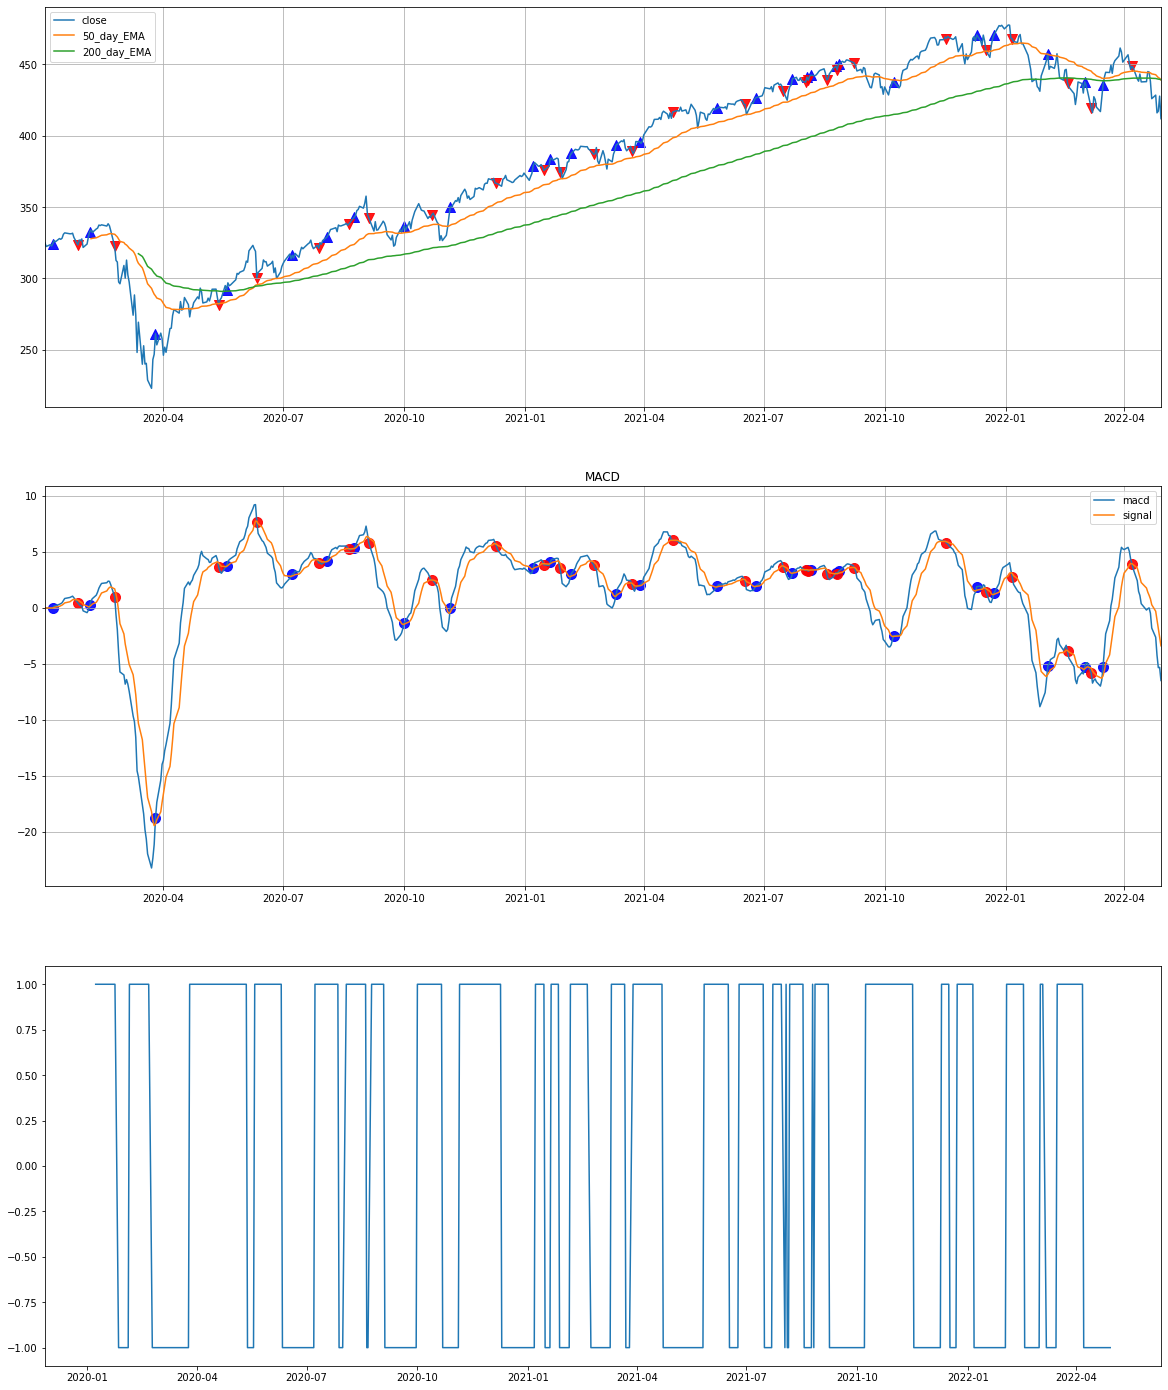

In [106]:
plot_MACD(df,macd_df)


In [146]:
def calculate_returns(df):
    # Calculate strategy returns (note date of first trade to use for buy & hold return calc)
    # Calculate buy & hold returns (make sure you adjust dates to account for warmup period)
    df_daily_returns = df.close.pct_change()
    df_daily_returns = df_daily_returns[1:] #Skip 1st column containing NaN value
    #print(df_daily_returns.tail())
    # Calculate the cumulative daily returns
    df_cum_daily_returns = (1 + df_daily_returns).cumprod() - 1
    #print(df_cum_daily_returns.tail())
    cum_return_entire_period = df_cum_daily_returns.iloc[-1]#.tail(1)
    total_return_bh = round(cum_return_entire_period * 100,2)
    print(f'Total B&H Return:  {total_return_bh}')
    print(f'Start Price {dt.datetime.date(df.iloc[0].name)}:  {round(df.close.iloc[0],2)}')
    print(f'End Price {dt.datetime.date(df.iloc[-1].name)}:  {round(df.close.iloc[-1],2)}')
    
calculate_returns(df)

Total B&H Return:  26.82
Start Price 2020-01-02:  324.87
End Price 2022-04-29:  412.0


(505, 10)